## Crime Data Analysis and Visualisation

In [4]:
import pandas as pd

In [5]:
crime = pd.read_csv("data.csv")

In [6]:
crime.head()

,Report Number,Date Reported,Date of Occurrence,Time of Occurrence,City,Crime Code,Crime Description,Victim Age,Victim Gender,Weapon Used,Crime Domain,Police Deployed,Case Closed,Date Case Closed
0,1,02-01-2020 00:00,01-01-2020 00:00,01-01-2020 01:11,Ahmedabad,576,IDENTITY THEFT,16,M,Blunt Object,Violent Crime,13,No,NaN
1,2,01-01-2020 19:00,01-01-2020 01:00,01-01-2020 06:26,Chennai,128,HOMICIDE,37,M,Poison,Other Crime,9,No,NaN
2,3,02-01-2020 05:00,01-01-2020 02:00,01-01-2020 14:30,Ludhiana,271,KIDNAPPING,48,F,Blunt Object,Other Crime,15,No,NaN
3,4,01-01-2020 05:00,01-01-2020 03:00,01-01-2020 14:46,Pune,170,BURGLARY,49,F,Firearm,Other Crime,1,Yes,29-04-2020 05:00
4,5,01-01-2020 21:00,01-01-2020 04:00,01-01-2020 16:51,Pune,421,VANDALISM,30,F,Other,Other Crime,18,Yes,08-01-2020 21:00


In [7]:
crime['Date Case Closed'] = crime['Date Case Closed'].fillna("")

In [9]:
crime['Weapon Used'] = crime['Weapon Used'].fillna("")

In [10]:
crime.isnull().sum()

Report Number         0
Date Reported         0
Date of Occurrence    0
Time of Occurrence    0
City                  0
Crime Code            0
Crime Description     0
Victim Age            0
Victim Gender         0
Weapon Used           0
Crime Domain          0
Police Deployed       0
Case Closed           0
Date Case Closed      0
dtype: int64

In [11]:
crime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40160 entries, 0 to 40159
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Report Number       40160 non-null  int64 
 1   Date Reported       40160 non-null  object
 2   Date of Occurrence  40160 non-null  object
 3   Time of Occurrence  40160 non-null  object
 4   City                40160 non-null  object
 5   Crime Code          40160 non-null  int64 
 6   Crime Description   40160 non-null  object
 7   Victim Age          40160 non-null  int64 
 8   Victim Gender       40160 non-null  object
 9   Weapon Used         40160 non-null  object
 10  Crime Domain        40160 non-null  object
 11  Police Deployed     40160 non-null  int64 
 12  Case Closed         40160 non-null  object
 13  Date Case Closed    40160 non-null  object
dtypes: int64(4), object(10)
memory usage: 4.3+ MB


In [12]:
crime['City'].value_counts()

City
Delhi            5400
Mumbai           4415
Bangalore        3588
Hyderabad        2881
Kolkata          2518
Chennai          2493
Pune             2212
Ahmedabad        1817
Jaipur           1479
Lucknow          1456
Kanpur           1112
Surat            1111
Nagpur           1053
Agra              764
Ludhiana          761
Visakhapatnam     728
Thane             706
Ghaziabad         704
Indore            699
Patna             695
Bhopal            690
Meerut            395
Srinagar          371
Nashik            366
Vasai             362
Varanasi          355
Kalyan            355
Faridabad         354
Rajkot            320
Name: count, dtype: int64

In [13]:
crime.describe()

,Report Number,Crime Code,Victim Age,Police Deployed
count,40160.000000,40160.000000,40160.00000,40160.000000
mean,20080.500000,349.360259,44.49126,10.006250
std,11593.337742,144.169205,20.22555,5.467951
min,1.000000,100.000000,10.00000,1.000000
25%,10040.750000,225.000000,27.00000,5.000000
50%,20080.500000,349.000000,44.00000,10.000000
75%,30120.250000,474.000000,62.00000,15.000000
max,40160.000000,599.000000,79.00000,19.000000


In [14]:
%matplotlib inline

In [15]:
# # For Plotting Histogram
# import matplotlib.pyplot as plt
# crime.hist(bins=50, figsize=(20, 15))

## Train-Test Split

In [16]:
# For Learning Purposes
import numpy as np
def split_train_test(data, test_ratio):
    np.random.seed(42)
    shuffled = np.random.permutation(len(data))
    print(shuffled)
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled[:test_set_size]
    train_indices = shuffled[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

In [17]:
# train_set, test_set = split_train_test(crime, 0.2)

In [18]:
# print(f"Rows in train set: {len(train_set)}\nRows in test set: {len(test_set)}")

In [19]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(crime, test_size=0.2, random_state = 42)
print(f"Rows in train set: {len(train_set)}\nRows in test set: {len(test_set)}")

Rows in train set: 32128
Rows in test set: 8032


In [20]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits = 1, test_size = 0.2, random_state = 42)
for train_index, test_index in split.split(crime, crime['Crime Domain']):
    strat_train_set = crime.loc[train_index]
    strat_test_set = crime.loc[test_index]

In [21]:
strat_test_set['Crime Domain'].value_counts()

Crime Domain
Other Crime         4590
Violent Crime       2294
Fire Accident        765
Traffic Fatality     383
Name: count, dtype: int64

In [22]:
crime = strat_train_set.copy()

## Trying out Attribute Combinations

In [23]:
crime["PolDepPerVicAge"] = crime['Police Deployed']/crime['Victim Age']

In [24]:
crime.head()

,Report Number,Date Reported,Date of Occurrence,Time of Occurrence,City,Crime Code,Crime Description,Victim Age,Victim Gender,Weapon Used,Crime Domain,Police Deployed,Case Closed,Date Case Closed,PolDepPerVicAge
20709,20710,14-05-2022 03:00,05-12-2022 21:00,13-05-2022 18:06,Delhi,279,DRUG OFFENSE,11,M,Poison,Other Crime,7,Yes,27-05-2022 03:00,0.636364
38353,38354,17-05-2024 10:00,05-17-2024 01:00,17-05-2024 20:06,Ahmedabad,412,BURGLARY,55,M,Knife,Other Crime,9,Yes,27-06-2024 10:00,0.163636
28958,28959,24-04-2023 05:00,04-21-2023 14:00,22-04-2023 03:43,Chennai,530,ASSAULT,65,M,Other,Violent Crime,16,No,,0.246154
12828,12829,18-06-2021 17:00,06-18-2021 12:00,18-06-2021 16:14,Ahmedabad,128,EXTORTION,75,M,Firearm,Other Crime,11,Yes,09-09-2021 17:00,0.146667
2874,2875,30-04-2020 17:00,04-29-2020 18:00,30-04-2020 08:31,Pune,149,FIREARM OFFENSE,78,F,Blunt Object,Fire Accident,2,Yes,03-06-2020 17:00,0.025641


In [25]:
corr_matrix = crime.corr(numeric_only=True)
corr_matrix['Victim Age'].sort_values(ascending = False)

Victim Age         1.000000
Report Number      0.004612
Police Deployed    0.000549
Crime Code        -0.005184
PolDepPerVicAge   -0.612470
Name: Victim Age, dtype: float64

<Axes: xlabel='PolDepPerVicAge', ylabel='Victim Age'>

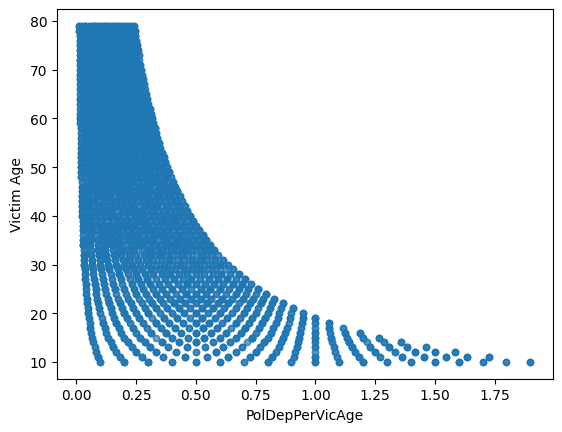

In [26]:
crime.plot(kind="scatter", x="PolDepPerVicAge", y="Victim Age", alpha=0.1)

## Looking for Correlations

In [27]:
corr_matrix = crime.corr(numeric_only=True)

In [28]:
corr_matrix['Police Deployed'].sort_values(ascending=False)

Police Deployed    1.000000
PolDepPerVicAge    0.589106
Report Number      0.003008
Crime Code         0.002798
Victim Age         0.000549
Name: Police Deployed, dtype: float64

array([[<Axes: xlabel='Crime Code', ylabel='Crime Code'>,
        <Axes: xlabel='Victim Age', ylabel='Crime Code'>,
        <Axes: xlabel='Police Deployed', ylabel='Crime Code'>],
       [<Axes: xlabel='Crime Code', ylabel='Victim Age'>,
        <Axes: xlabel='Victim Age', ylabel='Victim Age'>,
        <Axes: xlabel='Police Deployed', ylabel='Victim Age'>],
       [<Axes: xlabel='Crime Code', ylabel='Police Deployed'>,
        <Axes: xlabel='Victim Age', ylabel='Police Deployed'>,
        <Axes: xlabel='Police Deployed', ylabel='Police Deployed'>]],
      dtype=object)

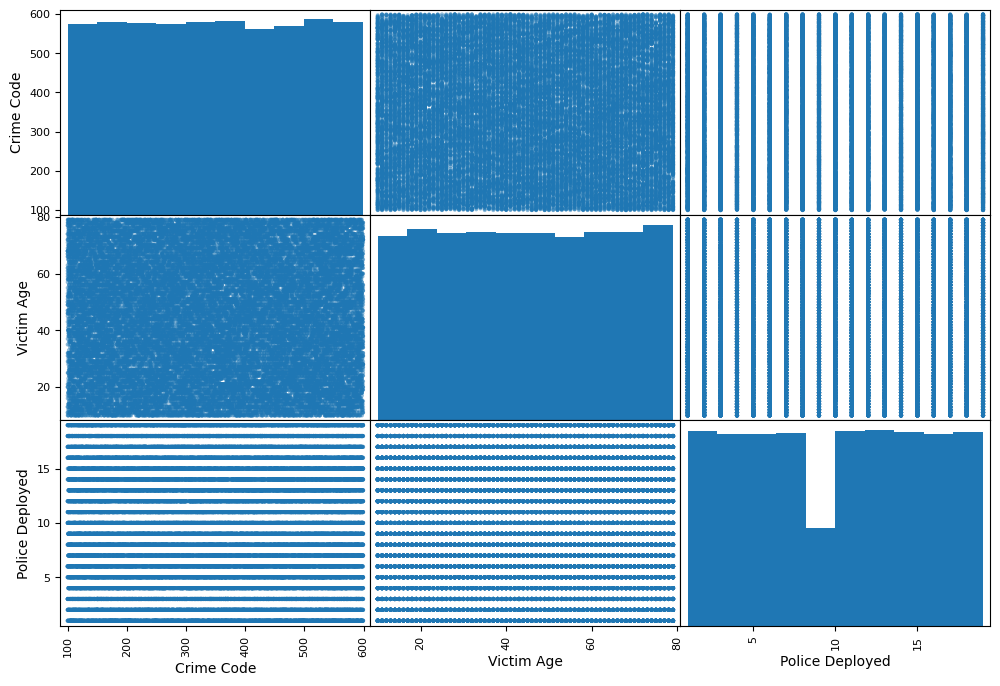

In [29]:
from pandas.plotting import scatter_matrix
attributes = ["Crime Code", "Victim Age", "Police Deployed"]
scatter_matrix(crime[attributes], figsize=(12,8))

In [30]:
crime = strat_train_set.drop("Date Case Closed", axis=1)
crime_labels = strat_train_set["Date Case Closed"].copy()

## Missing Attributes

In [31]:
# To get rid of missing attributes you have three options:
#     1. Get rid of the missing data points
#     2. Get rid of the whole attribute
#     3. Set the value to (0, mean, median or mode)

In [32]:
a = crime.dropna(subset=["Weapon Used"]) # Option 1
a.shape
# Note that the original crime data frame will remain unchanged

(32128, 13)

In [33]:
crime.drop("Weapon Used", axis=1).shape # Option 2
# Note that there is no Weapon Used column and also note that the original crime data frame will remain unchanged

(32128, 12)

In [34]:
mode = crime["Weapon Used"].mode()[0]  # Compute mode for optionn 3

In [35]:
crime["Weapon Used"].fillna(mode) # Option 3
# Note that the original crime data frame will remain unchanged

20709          Poison
38353           Knife
28958           Other
12828         Firearm
2874     Blunt Object
             ...     
21008         Firearm
11869           Knife
35956      Explosives
8824          Firearm
23426           Knife
Name: Weapon Used, Length: 32128, dtype: object

In [36]:
crime.describe()

,Report Number,Crime Code,Victim Age,Police Deployed
count,32128.000000,32128.000000,32128.000000,32128.000000
mean,20050.616409,349.528262,44.638882,10.009058
std,11583.493661,144.545890,20.256564,5.473321
min,1.000000,100.000000,10.000000,1.000000
25%,10054.750000,225.000000,27.000000,5.000000
50%,20060.500000,349.000000,45.000000,10.000000
75%,30078.250000,475.000000,62.000000,15.000000
max,40160.000000,599.000000,79.000000,19.000000


In [37]:
from sklearn.impute import SimpleImputer
cat_cols = crime.select_dtypes(include=['object', 'category']).columns
imputer = SimpleImputer(strategy="most_frequent")
imputer.fit(crime[cat_cols])

,missing_values,nan
,strategy,'most_frequent'
,fill_value,None
,copy,True
,add_indicator,False
,keep_empty_features,False


In [38]:
imputer.statistics_

array(['04-07-2021 13:00', '01-01-2020 00:00', '14-10-2022 06:54',
       'Delhi', 'BURGLARY', 'F', 'Knife', 'Other Crime', 'No'],
      dtype=object)

In [39]:
X = imputer.transform(crime[cat_cols])

In [40]:
crime_tr = pd.DataFrame(X, columns=cat_cols)

In [41]:
crime_tr.describe()

,Date Reported,Date of Occurrence,Time of Occurrence,City,Crime Description,Victim Gender,Weapon Used,Crime Domain,Case Closed
count,32128,32128,32128,32128,32128,32128,32128,32128,32128
unique,22272,32128,31938,29,21,3,7,4,2
top,05-03-2021 13:00,05-12-2022 21:00,14-10-2022 06:54,Delhi,BURGLARY,F,Knife,Other Crime,No
freq,6,1,3,4292,1599,17883,4694,18358,16073


## Scikit-learn Design

Primarily, three types of objects
1. Estimators - It estimates some parameter based on a dataset. Eg. imputer. It has a fit method and transform method. Fit method - Fits the dataset and calculates internal parameters
2. Transformers - transform method takes input and returns output based on the learnings from fit(). It also has a convenience function called fit_transform() which fits and then transforms.
3. Predictors - LinearRegression model is an example of predictor. fit() and predict() are two common functions. It also gives score() function which will evaluate the predictions.

## Feature Scaling

## Creating a Pipeline

In [42]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
# Separate numeric and categorical columns
num_cols = crime_tr.select_dtypes(include=['int64', 'float64']).columns
cat_cols = crime_tr.select_dtypes(include=['object', 'category']).columns

# Numeric pipeline
num_tr = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler()),
])

# Categorical pipeline
cat_tr = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)),
])

# Combine numeric and categorical pipelines
preprocessor = ColumnTransformer(transformers=[
    ('num', num_tr, num_cols),
    ('cat', cat_tr, cat_cols),
], remainder='passthrough')

In [43]:
crime_cat_tr = preprocessor.fit_transform(crime)

In [44]:
crime_cat_tr.shape

(32128, 13)

## Selecting a Desired Model

In [50]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(crime_cat_tr, crime_labels)

C:\Users\gvvig\AppData\Local\Temp\ipykernel_16260\3462066401.py:10: UserWarning: Parsing dates in %d-%m-%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  crime['Time of Occurrence'] = pd.to_datetime(crime['Time of Occurrence'], errors='coerce')


ValueError: could not convert string to float: '27-05-2022 03:00'